In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import seaborn as sn

In [12]:
train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)

In [11]:
train.head()

,0,1,2,3,4,5,6,7,8
0,M,3.1110,2.4990,0.8160,5.8446,3.044700,NaN,1.992463,8
1,M,2.3715,1.8360,0.5355,2.1981,1.222069,0.545700,NaN,9
2,M,2.4990,2.0145,0.7140,2.7999,1.129650,0.650250,0.765000,11
3,M,3.2130,2.5245,0.8160,5.5743,2.534700,1.127100,1.606500,12
4,M,2.9325,2.2185,0.6885,5.0592,2.203200,1.254302,NaN,10


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
0    10579 non-null object
1    10047 non-null float64
2    10051 non-null float64
3    10044 non-null float64
4    10055 non-null float64
5    10053 non-null float64
6    10073 non-null float64
7    10019 non-null float64
8    10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.9+ KB


In [14]:
train.describe()

,1,2,3,4,5,6,7,8
count,10047.000000,10051.000000,10044.000000,10055.000000,10053.000000,10073.000000,10019.000000,10579.000000
mean,2.799411,2.191942,0.767054,4.472830,2.005374,1.008515,1.296961,9.701200
std,0.528414,0.443913,0.235189,2.332749,1.107274,0.544529,0.641090,1.901391
min,1.045500,0.790500,0.000000,0.216750,0.086700,0.028050,0.079050,7.000000
25%,2.422500,1.887000,0.637500,2.629050,1.129650,0.586500,0.793050,8.000000
50%,2.856000,2.244000,0.765000,4.278900,1.881900,0.938400,1.249500,9.000000
75%,3.187500,2.499000,0.892500,6.002700,2.703000,1.351500,1.708500,11.000000
max,4.569913,3.776277,6.007583,14.175450,7.588800,3.876000,4.896377,16.000000


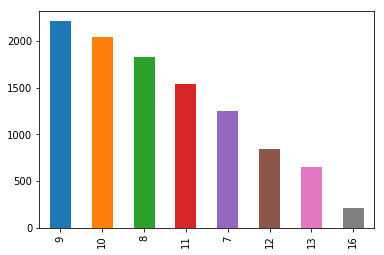

In [15]:
train.iloc[:,8].value_counts().plot('bar')

### Tha data are pretty much imbalanced. Classes 12, 13 and 16 are underrepresented.

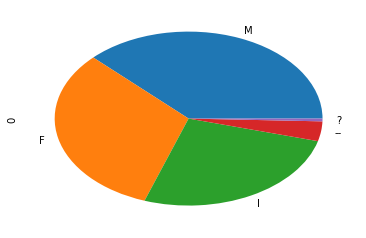

In [16]:
train.iloc[:,0].value_counts().plot.pie()

### Distribution of genders is moreless balanced.

In [18]:
train.shape

(10579, 9)

In [33]:
def plot_correlation(data, columns):
    cm = np.corrcoef(data.T)
    plt.figure(figsize=(10,10))
    heatmap = sn.heatmap(cm, cbar=True, annot=True, square=True,
                         fmt='.2f', annot_kws={'size':10}, xticklabels=columns, yticklabels=columns)

In [22]:
train = train.replace('?', np.nan)
train = train.replace('--', np.nan)
train = train.dropna(axis=0, how='any')
train.shape

(7058, 9)

In [23]:
train.iloc[:,0].unique()

array(['M', 'I', 'F'], dtype=object)

In [24]:
#encoding gender to numeric
u = train.iloc[:,0].unique()
u = {u[i] : i for i in range(len(u))}
train.iloc[:,0] = train.iloc[:,0].apply(lambda x: u[x])

### We can substitute column 1 with the product of columns 1,2,3, and column 4 with the sum of columns 4,5,6,7. (exactly columns 1 and 4 as the most correlated with other predictors)

In [41]:
train.iloc[:,1] = train.iloc[:,1]*train.iloc[:,2]*train.iloc[:,3] #smth like volume of an animal
train.iloc[:,4] = train.iloc[:,4]+train.iloc[:,5]+train.iloc[:,6]+train.iloc[:,7] #smth like total weight

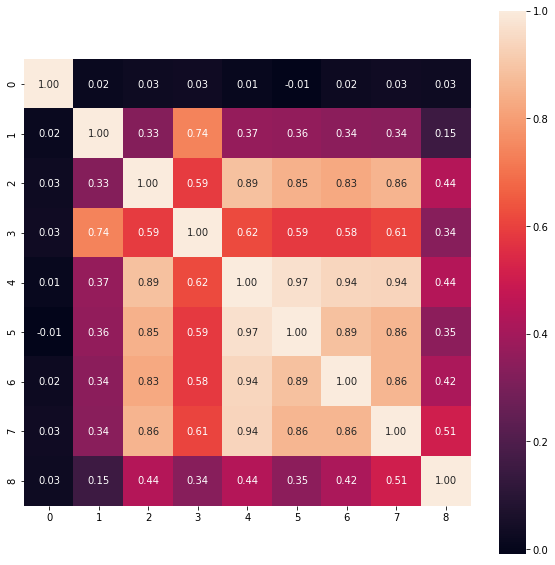

In [43]:
plot_correlation(train, train.columns)

In [44]:
X = train.values[:,:-1]
y = train.values[:, -1]

In [45]:
#Let's utilize robust scaler to deal with outliers and scale the data
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
X_scaled = rs.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, shuffle = True, random_state = 123)

In [47]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(predict_proba)

scores_ovr = cross_val_score(ovr, X_train, y_train, cv=5)
scores_ovr.mean()

NameError: name 'predict_proba' is not defined

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.306657223796034

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [54]:
scores_lr = cross_val_score(lr, X, y, cv=6)
scores_lr.mean()

0.31028787716649586

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=4)
scores_ridge = cross_val_score(ridge, X, y, cv=6)
scores_ridge.mean()

0.3136970070837632

In [67]:
from sklearn.linear_model import Lasso
lasso = Lasso()
scores_lasso = cross_val_score(lasso, X, y, cv=6)
scores_lasso.mean()

0.17371371068194838

In [71]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = 0.0001)
scores_en = cross_val_score(en, X, y, cv=6)
scores_en.mean()

d:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

0.3136639160856884

#### The best one is Ridge with alpha = 4